In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path2data="/Users/luizaadelinaciucu/Downloads/"
df=pd.read_csv(path2data+"event000021069-hits.csv")

In [7]:
df.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-96.0251,-11.043100,-1502.5,7,2,1
1,2,-57.1466,-5.425400,-1502.5,7,2,1
2,3,-83.1498,-9.277450,-1502.5,7,2,1
3,4,-70.7627,-11.261700,-1502.5,7,2,1
4,5,-73.3473,0.070458,-1502.5,7,2,1


In [8]:
from annoy import AnnoyIndex
import random

In [9]:
def buildAnnoyIndex(data,metric="angular",ntrees=10):
    f = len(data[0])
    t = AnnoyIndex(f,metric)  
    for i,d in enumerate(data):
        t.add_item(i, d)
    t.build(ntrees) # 10 trees
    return t

In [10]:
data=df[["x","y","z"]].values

index=buildAnnoyIndex(data,metric="angular",ntrees=10)


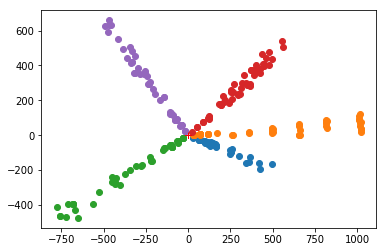

In [11]:
NB_BUCKET=5
for i in range(NB_BUCKET):
    n=random.choice(range(len(data)))
    
    bucket_idx=np.array(index.get_nns_by_item(n,50))
    bucket=df.iloc[bucket_idx]
    plt.plot(bucket.x,bucket.y,"o")
    plt.plot(0,0,"r+")
plt.show()